# MNIST dataset


# Stochastic Gradient Descent

In [5]:
import warnings
warnings.filterwarnings("ignore")

import h5py
import numpy as np
import sys
sys.path.append("../")
import hamiltonian.utils as utils

data_path = '../data/'

mnist_train=h5py.File(data_path+'mnist_train.h5','r')
X_train=mnist_train['X_train'][:].reshape((-1,28*28))
X_train=X_train/255.
y_train=mnist_train['y_train']

mnist_test=h5py.File(data_path+'mnist_test.h5','r')
X_test=mnist_test['X_test'][:].reshape((-1,28*28))
X_test=X_test/255.
y_test=mnist_test['y_test']

classes=np.unique(y_train)
D=X_train.shape[1]
K=len(classes)
y_train=utils.one_hot(y_train[:],K)
y_test=utils.one_hot(y_test[:],K)

In [6]:
import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


import hamiltonian.softmax as softmax


eta=1e-5
epochs=50
batch_size=50
alpha=1./10.


start_time=time.time()
start_p={'weights':np.zeros((D,K)),
        'bias':np.zeros((K))}
hyper_p={'alpha':alpha}

par,loss=softmax.sgd(X_train,y_train,K,start_p,hyper_p,eta=eta,epochs=epochs,batch_size=batch_size,verbose=0)
elapsed_time=time.time()-start_time 

print('elapsed time : {0:.4f}'.format(elapsed_time))
y_pred=softmax.predict(X_test,par)

print(classification_report(y_test[:].argmax(axis=1), y_pred))
print(confusion_matrix(y_test[:].argmax(axis=1), y_pred))

plt.plot(loss)
plt.show()


elapsed time : 32.2885
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       980
           1       0.88      0.96      0.92      1135
           2       0.88      0.81      0.84      1032
           3       0.81      0.87      0.84      1010
           4       0.85      0.87      0.86       982
           5       0.88      0.66      0.76       892
           6       0.87      0.91      0.89       958
           7       0.89      0.86      0.88      1028
           8       0.80      0.81      0.81       974
           9       0.82      0.83      0.82      1009

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.85     10000

[[ 941    0    4    4    0    4   17    1    9    0]
 [   0 1088    8    3    1    3    4    0   28    0]
 [  16   29  832   28   21    0   30   22   49    5]
 [   5    4   25  877    1   25    8   22   30   13]
 [   3

<Figure size 640x480 with 1 Axes>

# Hamiltonian Monte Carlo

In [ ]:
import hamiltonian.hmc as hmc

start_time=time.time()
mcmc=hmc.HMC(X_train,y_train,softmax.loss, softmax.grad, start_p,hyper_p, path_length=1,verbose=0)
posterior_sample,logp_samples=mcmc.multicore_sample(1e3,1e2)
elapsed_time=time.time()-start_time 
print('elapsed time : {0:.4f}'.format(elapsed_time))

post_par={var:np.mean(posterior_sample[var],axis=0).reshape(start_p[var].shape) for var in posterior_sample.keys()}
y_pred=softmax.predict(X_test,post_par)
print(classification_report(y_test.argmax(axis=1), y_pred))
print(confusion_matrix(y_test.argmax(axis=1), y_pred))

step_size 0.0156, acceptance prob: 1.00, direction : -1.00


  0%|          | 0/100 [00:00<?, ?it/s]

step_size 0.0156, acceptance prob: 1.00, direction : -1.00


  0%|          | 0/100 [00:00<?, ?it/s]

step_size 0.0156, acceptance prob: 1.00, direction : -1.00


  1%|          | 1/100 [00:12<20:18, 12.30s/it]

step_size 0.0156, acceptance prob: 1.00, direction : 1.00


  8%|▊         | 21/250 [04:31<55:40, 14.59s/it]

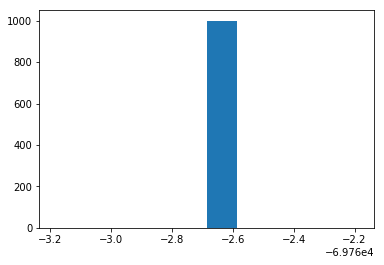

In [22]:
plt.hist(logp_samples)
plt.show()

# Stochastic Gradient HMC

In [23]:
import hamiltonian.sghmc as sampler

mcmc=sampler.SGHMC(X_train,y_train,softmax.loss, softmax.grad, start_p,hyper_p, path_length=1,verbose=0)
start_time=time.time()
posterior_sample,logp_samples=mcmc.sample(1e2,1e1,batch_size=batch_size)
elapsed_time=time.time()-start_time
print('elapsed time : {0:.4f}'.format(elapsed_time))

post_par={var:np.mean(posterior_sample[var],axis=0).reshape(start_p[var].shape) for var in posterior_sample.keys()}
y_pred=softmax.predict(X_test,post_par)
print(classification_report(y_test.argmax(axis=1), y_pred))
print(confusion_matrix(y_test.argmax(axis=1), y_pred))

  0%|          | 0/10 [00:00<?, ?it/s]

step_size 0.0156, acceptance prob: 1.00, direction : -1.00


 47%|████▋     | 47/100 [5:04:52<6:00:09, 407.73s/it]

KeyboardInterrupt: 

In [ ]:
plt.hist(logp_samples)
plt.show()